# ipython notebook を用いた、データ解析の方法 #
桂誠

[INDEX](https://sites.google.com/site/makotokatsura4ipythonnotebook/ipythonnb4jpnexp)

## はじめに ##
pythonは汎用性のあるプログラミング言語であり、現在は様々な分野で使われています。  
科学的なデータ解析の分野では、

* numpy
* scipy
* matplotlib

といったパッケージを用いる事により、柔軟で高精度なデータ解析と奇麗なグラフ作成が可能です。

しかし、そのためには、pythonをプログラミング言語として習得しつつ、これらのパッケージの利用方法をも知る必要があります。  
これは、初心者には大変難しい事のように見えると思います。  
ここでは、ipython notebookを用いた方法を紹介します。  

## Hello World ##
プログラミング言語を勉強した方ならご存知の通り、"Hello World!"という一文を出力するところから、スタートさせましょう。

In [1]:
print("Hello World!")

Hello World!


上のIn [1]: の下に  
print "Hello World!"  
と入力し、shiftキーを押しながら、enterキーを押して下さい。  
そうすれば、この命令が実行され、入力行の下に
Hello World!
と出力されるはずです。  
これではじめの一歩は終わりです。

## 基本的な考え方 ##
初心者は知識がありません。したがって、効率的なプログラミングなどできるはずがありません。  
ipython notebookはそのような人に優しい環境だと思います。  
できる事を増やしていって、それを整理していけば自然にプログラムが積みあがっていきます。

## できる事をどうやって増やすか ##
勿論、基本的な事項については入門書や入門サイトを見る事が役に立ちます。  
しかし、どの部分が最初から重要か、というのはなかなか分かりにくいと思います。  
お勧めの方法は、まずは他人に聞くことです。  
教えてもらった方法を試し、その意味と応用範囲を理解するようにすれば、自然とやり方が身につくと思います。

## どうやって整理するか ##
おそらく、次のような段階があると思います。

1. 複数のセルの命令を一つのセルにまとめる。そうすれば、このセルをコピーすることで再利用できる。
2. まとめたセルを元に、関数を定義する。そうすれば、一つのnotebookの中で簡単に再利用できる。
3. いくつかの有用な関数ができたら、独立したパイソンファイル（拡張子.py）の形式で保存する。パイソンファイルはimportという方法で呼び出して再利用できる。
4. オブジェクト指向プログラミングの考え方を学び、クラスを定義したパイソンファイルを作成して利用する。

I.からIII．ができれば、大抵の解析は可能になります。しかし、IVのオブジェクト指向を理解すれば、プログラミング技術としては、幅が広がります。  
具体的には、既存のパッケージを使う方法も広がりますし、自分でパッケージを作る際にも柔軟にできるようになります。  
プログラミングに興味のある人はIVまでを視野に入れると良いと思います。  

### I. セルをまとめる ###
複数のセルを一つにまとめる例をみていきましょう。　　
まず、デモ用のデータファイルを作りましょう。　　
下記のテキストをメモ帳などに貼りつけ、demo_data.txtという名前で保存してください。

まずは、保存したファイル名を変数に代入しましょう。つまり、パイソンが参照できるようにデータとして格納するという事です。

In [2]:
filename='demo_data.txt'

次に、保存したデータファイルのフォルダ名も同様にしましょう。これは、ユーザーによって異なるはずですので、どこに保存したかを探してください。

フォルダ名が分からない人は、ファイルを右クリックして、プロパティを見れば、場所として記されていますので、それをコピーしてください。

In [3]:
folder_name='C:\Users\mk\Documents\python'

ただし、ファイル名やフォルダ名に日本語が含まれている場合には、’’の前にuを付けてください。
また、フォルダの区切りの￥の代わりに/を用いてください。

In [4]:
folder_name=u'C:/Users/mk/Documents/2013/テスト'

In [5]:
data_fullpath=folder_name+'\\'+filename

In [6]:
print(data_fullpath)

C:/Users/mk/Documents/2013/テスト\demo_data.txt


このように、フォルダ名とファイル名を足して表示すると何となくOKな気がします。
気持ちの悪い人は以下で確認できます。

In [7]:
import os.path                            # os.pathというモジュールのインポート
print(os.path.normpath(data_fullpath))    # 標準的な記法にして、表示する。

C:\Users\mk\Documents\2013\テスト\demo_data.txt


それでは、データファイルを開いてみましょう。
numpyというパッケージのloadtxtという関数を使います。
通常、使うパッケージはimportする必要がありますが、

     ipython notebook --pylab=inline

でここを起動していれば、importは自動的にされています。

In [8]:
data=np.loadtxt(data_fullpath,delimiter=',', skiprows=1) # 列の区切り文字はコンマ、先頭行のみコメントなので飛ばす。

In [9]:
print(data)

[[  1.    1. ]
 [  2.    3.8]
 [  3.    9.5]
 [  4.   17. ]
 [  5.   28. ]]


次に、これをグラフにしてみましょう。
今度はmatplotlibというパッケージのpyplotというモジュールを使いますが、これも既にimportされており、pltという名前が付いています。

In [10]:
plt

<module 'matplotlib.pyplot' from 'C:\Python27\lib\site-packages\matplotlib\pyplot.pyc'>

その様子は上記の様に確認できます。さて、グラフを作ります。1列目をｘとします。

In [11]:
x=data[:,0] # pythonでは０から数える。大抵のプログラミング言語がそう。

2列目をyとします。


In [12]:
y=data[:,1]

x、yでグラフにしてみましょう。

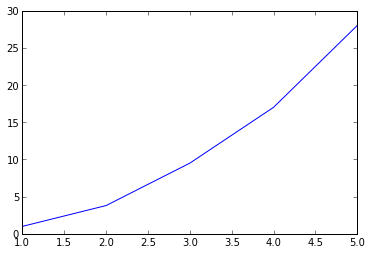

In [13]:
plt.plot(x,y)

離散データなので、丸印にしましょう。

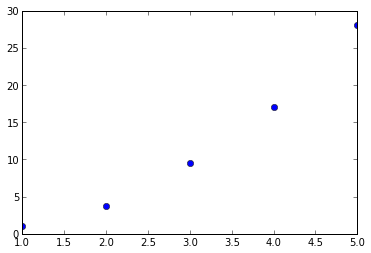

In [14]:
plt.plot(x,y,'o')

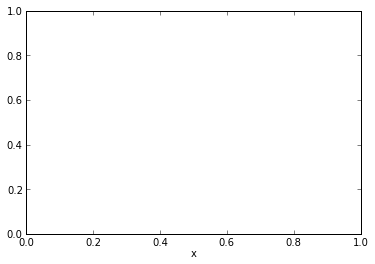

In [15]:
plt.xlabel('x')

plotと同じセルでないと、うまくいかないようです。

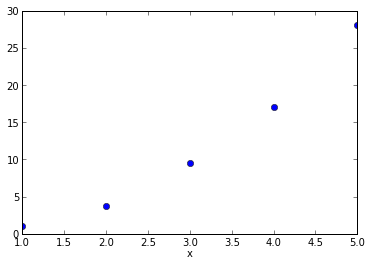

In [16]:
plt.plot(x,y,'o')
plt.xlabel('x')

同様にいろいろと見た目を揃えていきましょう。

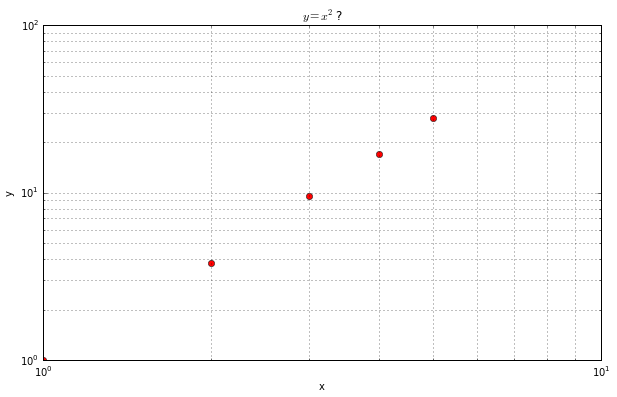

In [17]:
plt.plot(x,y,'ro')# rは赤の事
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = x^2$?')# $で挟むと数式も書ける。
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
f=plt.gcf()
f.set_size_inches(10.0,6.0) # グラフのサイズ調整

さて、必須のセルをまとめてみましょう。  
まずは、以下に集めます。  
ツールボタンを利用して、コピーしてPaste belowとし、Move cell downとすれば移動できます。  
移動できたら、EditメニューのMerge cell above, belowを使って整理できます。  

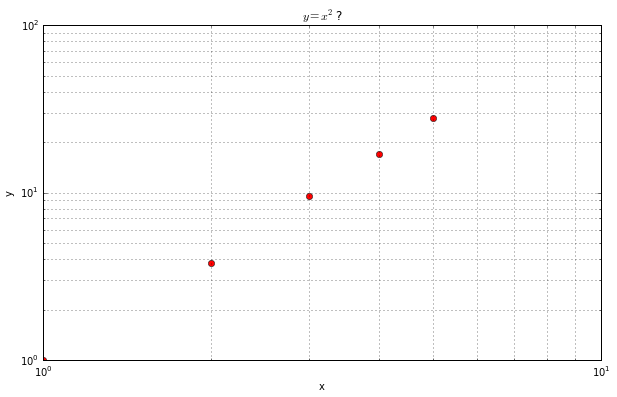

In [18]:
filename='demo_data.txt'
folder_name=u'C:/Users/mk/Documents/2013/テスト'
data_fullpath=folder_name+'\\'+filename
data=np.loadtxt(data_fullpath,delimiter=',', skiprows=1) # 列の区切り文字はコンマ、先頭行のみコメントなので飛ばす。
x=data[:,0] # pythonでは０から数える。大抵のプログラミング言語がそう。
y=data[:,1]
plt.plot(x,y,'ro')# rは赤の事
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = x^2$?')# $で挟むと数式も書ける。
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
f=plt.gcf()
f.set_size_inches(10.0,6.0) # グラフのサイズ調整

1個にまとめたこのセルだけで正しく動作するかどうかは、まずKernelをRestartし、このセルだけを選択して実行すれば確認できるでしょう。

### II. 関数にする ###
まとめたセルのうち、再利用しそうな部分を関数として定義しましょう。
簡単です。

In [19]:
def file_plot_xy(fullpath, y_offset=0):
    data=np.loadtxt(fullpath,delimiter=',', skiprows=1) # 列の区切り文字はコンマ、先頭行のみコメントなので飛ばす。
    x=data[:,0] # pythonでは０から数える。大抵のプログラミング言語がそう。
    y=data[:,1]+y_offset
    plt.plot(x,y,'o',label='y offset = '+str(y_offset))# rは赤の事
    plt.xlabel('x')
    plt.ylabel('y')


後で使うために、少し手を加えました。オプションとして、y_offsetという引数を与える事ができます。  
この引数が設定されていなければ、デフォルト値は0になっています。  
また、凡例（legend）に使えるように、ラベルを設定しました。


In [20]:
file_plot_xy(data_fullpath,y_offset=1)
plt.legend()


今度は、天下りに便利な関数を与えます。  
これは、グラフの色を後から設定する関数です。  
一つだけ設定すると、最初のプロットのみが色変更されます。  
多数設定すると、可能な範囲で色を変更します。
[set_color_cycleという関数](http://matplotlib.org/api/axes_api.html?highlight=set_color_cycle#matplotlib.axes.Axes.set_color_cycle)も初めからありますが,プロット前に設定する必要があります。こちらはプロット後に変更する関数です。

In [21]:
def set_plot_color(colors):  # set_color_cycle()という関数も初めからありますが,プロット前に設定する必要があります。こちらはプロット後に変更する関数です。
    ax=plt.gca()#現時点で描画対象となっているグラフのxy軸をaxとする。
    #ax.set_color_cycle(colors)
    lines=ax.lines  #axで描画された線（離散的なプロットも含む）のリストをlinesとする。
    if not isinstance(colors, list):#この関数の引数colorsがリストでない場合、つまり、単体の色指定だった場合、
        line0=lines[0]#最初の線をline0として、
        line0.set_color(colors)#その色をcolorsにせよ。
    else:                            # colorsがリストだった場合、
        for i in range(min(len(lines),len(colors))):#そのメンバー数とlinesの数の少ない方までで、
            line=lines[i]#一つ一つの線に対して、
            line.set_color(colors[i])#色を指定します。

設定したオフセットとラベルを利用して、色んな色でグラフを書いてみます。

In [22]:
#set_plot_color(['black', 'red', 'blue', 'green','#ff00ff'])# 色の指定の仕方の例
file_plot_xy(data_fullpath)
file_plot_xy(data_fullpath,y_offset=1.0)
file_plot_xy(data_fullpath,y_offset=2.0)
file_plot_xy(data_fullpath,y_offset=3.0)
file_plot_xy(data_fullpath,y_offset=4.0)
set_plot_color(['black', 'red', 'blue', 'green','#ff00ff'])# 色の指定の仕方の例
plt.legend(loc='best')  #最適な場所に凡例を書け
f=plt.gcf()
f.set_size_inches(10.0,6.0) # グラフのサイズ調整

その２に続く。（異なるノートファイルにリンクするのは容易ではなさそうなので、リンクはありません。）

# 蛇足 #
僕自身は普段は

    ipython notebook --pylab=inline

ではなく、spyder上で作業をしています。
にも関わらず、ここで紹介している理由を書いておきます。
Matlabという高価なソフトがあります。これは今でもおそらく多くのユーザを有している数値解析ソフトです。
これを目指して開発されたオープン、フリーなソフトにはoctave, scilab, pylabとあります。
ここで紹介しているのはpylabの環境の最新の形態という事になります。
この環境はMatlabやMathematicaで古くから実現していた形態に近く、初心者にはとても入りやすいものです。
僕自身もその段階を踏んで今に至っています。

この環境だとグラフはそれほど奇麗には見えません。

    ipython notebook --pylab

で起動すると、多数のグラフがかさなってしまいますが、一旦グラフを閉じて、最後のグラフを再実行すると、
僕が普段から目にしているMatplotlibの出力になります。

とはいえ、試行錯誤がしやすく、その形跡を残しやすく、しかも、整理もしやすいというこの環境は初心者のみならず、
試行錯誤をしながら解析方法を悩む環境としても優れていると思います。

プログラム開発環境としては、spyderをお勧めします。